In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
df_vehicle=pd.read_csv('/Users/jianangong/Downloads/Motor_Vehicle_Registration.csv')
df_google=pd.read_csv('/Users/jianangong/Downloads/geoMap.csv')

In [4]:
df_vehicle_1=df_vehicle.loc[df_vehicle['City/Province(1).1']=='Whole country']

In [5]:
df_vehicle_1.set_index(df_vehicle_1['City/Province(1)'],inplace=True)

In [6]:
df_vehicle_1

,City/Province(1),City/Province(1).1,Level01(1),2020. 02
City/Province(1),,,,
Seoul,Seoul,Whole country,Total,3123984
Busan,Busan,Whole country,Total,1398638
Daegu,Daegu,Whole country,Total,1191697
Incheon,Incheon,Whole country,Total,1635589
Gwangju,Gwangju,Whole country,Total,678442
Daejeon,Daejeon,Whole country,Total,675685
Ulsan,Ulsan,Whole country,Total,566679
Gyeonggi,Gyeonggi,Whole country,Total,5780213
Sejong,Sejong,Whole country,Total,165486


In [7]:
df_google=df_google.iloc[1:]

In [8]:
df_google

,Category: All categories
Seoul,100
Busan,97
Gyeonggi-do,92
Jeju-do,91
Incheon,90
Chungcheongnam-do,88
Daejeon,87
Ulsan,85
Jeollanam-do,85
Gyeongsangnam-do,85


In [9]:
df_region = pd.read_csv("/Users/jianangong/Downloads/coronavirusdataset/Region.csv")
region_info = df_region.copy()
region_info = region_info.groupby('province')[['elementary_school_count', 'kindergarten_count', 'university_count', 'nursing_home_count']].sum()

In [10]:
df3 = df_region.copy()
df3 = df3.groupby('province')[['academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio']].mean()
region_info[['academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio']] = df3[['academy_ratio', 'elderly_population_ratio', 'elderly_alone_ratio']]

In [11]:
region_info['vehicle']=df_vehicle_1['2020. 02']
region_info['search']=df_google

In [12]:
region_info.drop(['Korea'],inplace=True)
region_info.loc[['Gyeonggi-do'],['vehicle']]=5780213
region_info.loc[['Jeju-do'],['vehicle']]=602132

In [13]:
region_info.fillna(0,inplace=True)
region_info[['search']] = region_info[['search']].astype(int)

In [14]:
region_info['search'].replace(0,region_info['search'].mean(),inplace=True)

In [15]:
# region_info['sickbed'].replace(0,region_info['sickbed'].mean(),inplace=True)

In [16]:
region_info

,elementary_school_count,kindergarten_count,university_count,nursing_home_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,vehicle,search
province,,,,,,,,,
Busan,608,816,44,13504,1.327647,19.357647,9.094118,1398638,97.000000
Chungcheongbuk-do,518,656,34,5538,1.023333,23.192500,11.825000,840706,80.000000
Chungcheongnam-do,818,998,42,7282,1.122500,23.844375,11.706250,1123220,88.000000
Daegu,458,710,22,10166,1.713333,17.031111,7.966667,1191697,81.000000
Daejeon,296,520,30,5968,1.425000,14.376667,6.200000,675685,87.000000
Gangwon-do,698,736,36,5038,1.116842,22.890526,11.578947,785806,81.000000
Gwangju,310,624,34,5704,2.473333,14.815000,6.716667,678442,79.000000
Gyeonggi-do,2554,4474,122,40982,1.420625,14.429688,6.084375,5780213,92.000000
Gyeongsangbuk-do,942,1414,66,8948,0.948750,27.556250,15.133333,1451298,82.000000


In [17]:
raw_caseregion=pd.read_csv('/Users/jianangong/Downloads/coronavirusdataset/TimeProvince.csv')
end_date='2020-04-30'

In [18]:
caseregion_30=raw_caseregion.loc[(raw_caseregion.date==end_date)]
caseregion_30.fillna(0,inplace=True)



In [26]:
region_df=pd.merge(caseregion_30,region_info,left_on='province',right_index=True)

In [27]:
case_region=pd.merge(caseregion_30,R,left_on='province',right_index=True,how='left')
case_region.rename(columns={'patient_id_x':'R'},inplace=True)

In [20]:
from datetime import datetime
import numpy as np

In [21]:
raw_caseregion=raw_caseregion.where(raw_caseregion.confirmed!=0)
first_date=raw_caseregion['date'].groupby(raw_caseregion['province']).min()
first_date=pd.to_datetime(first_date,format="%Y-%m-%d")
end_date=datetime(2020,5,17)  #predicted end date
duration=end_date-first_date

In [22]:
duration=(duration / np.timedelta64(1, 'D')).astype(int)


In [23]:
patient_info = pd.read_csv("PatientInfo.csv")
infected=patient_info[['patient_id']].loc[patient_info['infected_by']!='nan'] \
                                .groupby(patient_info['infected_by']) \
                                .count()
patient_info['count']=infected['patient_id']
infect=pd.merge(infected,patient_info,left_index=True,right_on='patient_id').sort_values('patient_id_x', ascending=False)

In [28]:
R = infect[['patient_id_x']].groupby(infect['province']).mean().sort_values('patient_id_x', ascending=False)


In [29]:
R

,patient_id_x
province,
Daegu,17.000000
Gyeonggi-do,3.102273
Chungcheongnam-do,2.871795
Chungcheongbuk-do,2.666667
Gwangju,2.000000
Seoul,1.807692
Ulsan,1.714286
Gyeongsangbuk-do,1.685714
Busan,1.500000


In [30]:
case_region=pd.merge(caseregion_30,R,left_on='province',right_index=True,how='left')
case_region.rename(columns={'patient_id_x':'R'},inplace=True)

In [31]:
region_final=case_region.fillna(case_region.loc[case_region.R<10].mean())

In [32]:
region_final.set_index('province',inplace=True)
region_final['duration']=duration

In [33]:
region_df=region_final.iloc[:,1:]
cluster_df=region_final.iloc[:,2:]

In [34]:
region_df

,time,confirmed,released,deceased,R,duration
province,,,,,,
Seoul,0,633,453,2,1.807692,111
Busan,0,137,116,3,1.500000,87
Daegu,0,6852,6144,172,17.000000,89
Incheon,0,93,68,0,1.200000,118
Gwangju,0,30,27,0,2.000000,103
Daejeon,0,40,35,0,1.333333,85
Ulsan,0,43,37,1,1.714286,85
Sejong,0,46,38,0,1.500000,85
Gyeonggi-do,0,676,486,15,3.102273,114


In [35]:
cluster_df

,confirmed,released,deceased,R,duration
province,,,,,
Seoul,633,453,2,1.807692,111
Busan,137,116,3,1.500000,87
Daegu,6852,6144,172,17.000000,89
Incheon,93,68,0,1.200000,118
Gwangju,30,27,0,2.000000,103
Daejeon,40,35,0,1.333333,85
Ulsan,43,37,1,1.714286,85
Sejong,46,38,0,1.500000,85
Gyeonggi-do,676,486,15,3.102273,114


In [36]:
from sklearn import preprocessing
t= preprocessing.StandardScaler().fit(cluster_df)
cluster_df=t.transform(cluster_df)

In [37]:
from sklearn.cluster import KMeans

In [42]:
res = KMeans(random_state=2498,n_clusters=3).fit(cluster_df)
region_df['label']=res.labels_

In [43]:
region_df

,time,confirmed,released,deceased,R,duration,label
province,,,,,,,
Seoul,0,633,453,2,1.807692,111,0
Busan,0,137,116,3,1.500000,87,2
Daegu,0,6852,6144,172,17.000000,89,1
Incheon,0,93,68,0,1.200000,118,0
Gwangju,0,30,27,0,2.000000,103,0
Daejeon,0,40,35,0,1.333333,85,2
Ulsan,0,43,37,1,1.714286,85,2
Sejong,0,46,38,0,1.500000,85,2
Gyeonggi-do,0,676,486,15,3.102273,114,0


In [44]:
region_info['label']=region_df['label']

In [45]:
import geopandas as gpd
shp = gpd.read_file("skorea-provinces.geojson")
shp = shp[['name_eng', 'geometry']]
geo = {ind: region_df.label[ind] for ind in region_df.index}
shp['label'] = shp.name_eng.map(geo)

In [46]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(16, 16))
ax.set_title("Clusters in S.Korea", fontsize=18)
shp.plot(axes=ax, column='label', cmap='Reds')

In [47]:
label = region_info['label']
region_info.drop('label', axis=1, inplace=True)

In [48]:
region_info

,elementary_school_count,kindergarten_count,university_count,nursing_home_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,vehicle,search
province,,,,,,,,,
Busan,608,816,44,13504,1.327647,19.357647,9.094118,1398638,97.000000
Chungcheongbuk-do,518,656,34,5538,1.023333,23.192500,11.825000,840706,80.000000
Chungcheongnam-do,818,998,42,7282,1.122500,23.844375,11.706250,1123220,88.000000
Daegu,458,710,22,10166,1.713333,17.031111,7.966667,1191697,81.000000
Daejeon,296,520,30,5968,1.425000,14.376667,6.200000,675685,87.000000
Gangwon-do,698,736,36,5038,1.116842,22.890526,11.578947,785806,81.000000
Gwangju,310,624,34,5704,2.473333,14.815000,6.716667,678442,79.000000
Gyeonggi-do,2554,4474,122,40982,1.420625,14.429688,6.084375,5780213,92.000000
Gyeongsangbuk-do,942,1414,66,8948,0.948750,27.556250,15.133333,1451298,82.000000


In [49]:
region_info

,elementary_school_count,kindergarten_count,university_count,nursing_home_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,vehicle,search
province,,,,,,,,,
Busan,608,816,44,13504,1.327647,19.357647,9.094118,1398638,97.000000
Chungcheongbuk-do,518,656,34,5538,1.023333,23.192500,11.825000,840706,80.000000
Chungcheongnam-do,818,998,42,7282,1.122500,23.844375,11.706250,1123220,88.000000
Daegu,458,710,22,10166,1.713333,17.031111,7.966667,1191697,81.000000
Daejeon,296,520,30,5968,1.425000,14.376667,6.200000,675685,87.000000
Gangwon-do,698,736,36,5038,1.116842,22.890526,11.578947,785806,81.000000
Gwangju,310,624,34,5704,2.473333,14.815000,6.716667,678442,79.000000
Gyeonggi-do,2554,4474,122,40982,1.420625,14.429688,6.084375,5780213,92.000000
Gyeongsangbuk-do,942,1414,66,8948,0.948750,27.556250,15.133333,1451298,82.000000


In [50]:
scaler = preprocessing.StandardScaler().fit(region_info)
X = scaler.transform(region_info)

In [51]:
X

array([[-1.75894186e-01, -2.22683182e-01,  1.46380550e-01,
         2.00642397e-01, -2.37404001e-01,  2.81060389e-02,
        -1.09277156e-01,  1.55098727e-03,  1.81283011e+00],
       [-3.36370098e-01, -3.90049376e-01, -1.85415363e-01,
        -4.52924608e-01, -1.00695745e+00,  6.98439294e-01,
         5.65682909e-01, -4.38170200e-01, -1.02451756e+00],
       [ 1.98549609e-01, -3.23041367e-02,  8.00213673e-02,
        -3.09838887e-01, -7.56183184e-01,  8.12387207e-01,
         5.36332868e-01, -2.15513332e-01,  3.10704873e-01],
       [-4.43354039e-01, -3.33563286e-01, -5.83570459e-01,
        -7.32223612e-02,  7.37925656e-01, -3.78573028e-01,
        -3.87935952e-01, -1.61544770e-01, -8.57614752e-01],
       [-7.32210681e-01, -5.32310641e-01, -3.18133728e-01,
        -4.17645445e-01,  8.78368333e-03, -8.42570582e-01,
        -8.24582168e-01, -5.68227680e-01,  1.43802070e-01],
       [-1.54182739e-02, -3.06366279e-01, -1.19056181e-01,
        -4.93946891e-01, -7.70490959e-01,  6.456542

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.29930
Feature: 4, Score: 0.15962
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.36948
Feature: 8, Score: 0.17160


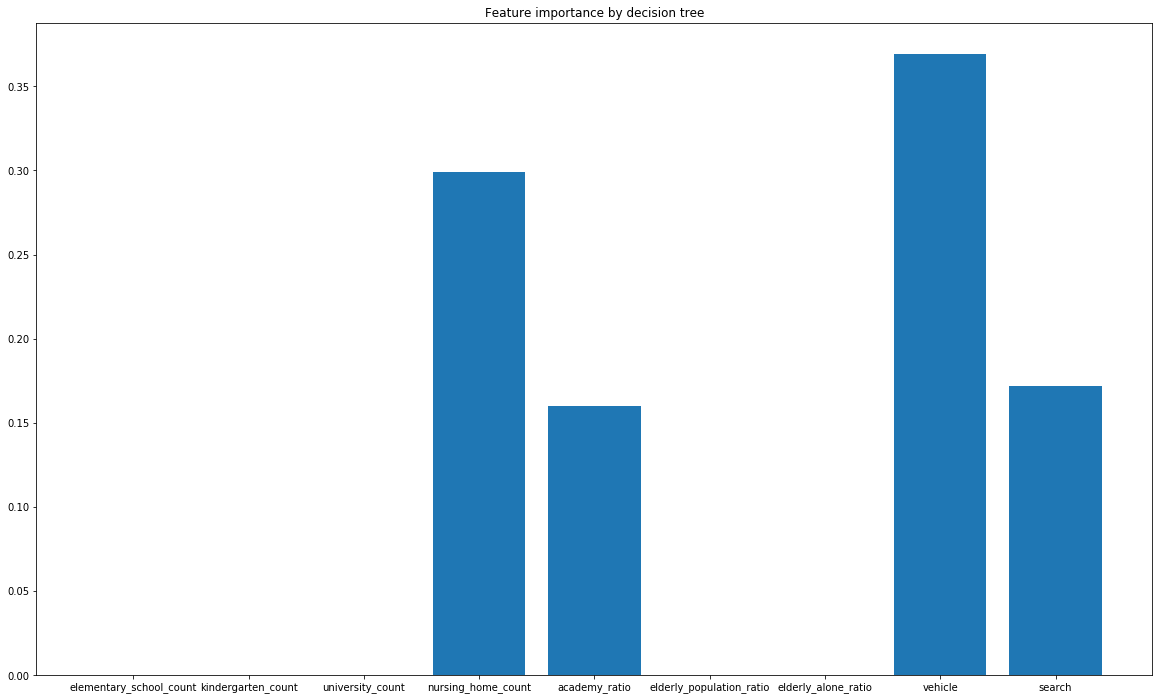

In [52]:
# decision tree for feature importance on a classification problem
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot

model = DecisionTreeClassifier(random_state=309).fit(X, label)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(20,12))
pyplot.bar([x for x in region_info.columns], importance)
pyplot.title('Feature importance by decision tree')
pyplot.show()

Feature: 0, Score: 0.15035
Feature: 1, Score: 0.03391
Feature: 2, Score: 0.13687
Feature: 3, Score: 0.18230
Feature: 4, Score: 0.09854
Feature: 5, Score: 0.09716
Feature: 6, Score: 0.08582
Feature: 7, Score: 0.03974
Feature: 8, Score: 0.17532


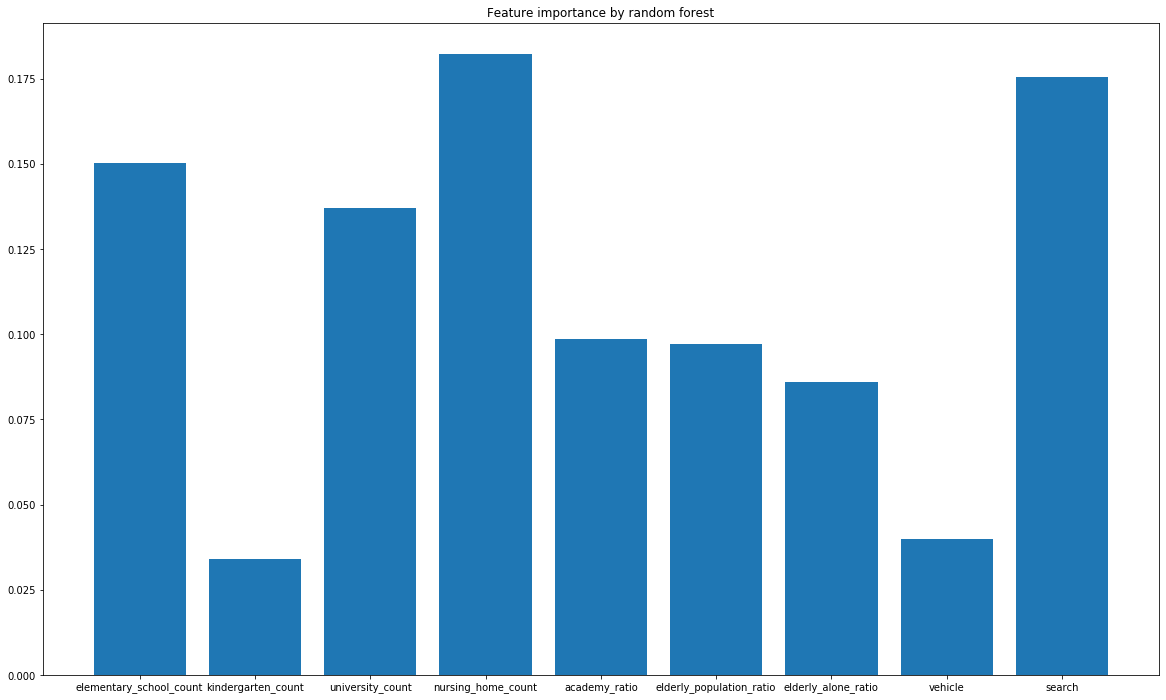

In [53]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
model = RandomForestClassifier(random_state=309).fit(X, label)
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(20,12))
pyplot.bar([x for x in region_info.columns], importance)
pyplot.title('Feature importance by random forest')
pyplot.show()